# 이름: 
# 학번: 
# 학과: 

## Q1. 파이썬 내장 함수만 이용하여 평균을 구하는 함수를 작성하세요.

In [1]:
def mean(data):
    if isinstance(data, list):
        return sum(data)/len(data)
    else:
        raise TypeError("list만 입력 가능합니다.")
    
mean([1,2,3,4,5]) # return 3.0
# example2 = mean(5) # raise TypeError


3.0

## Q2. 파이썬 내장 함수만 이용하여 모집단의 분산을 구하는 함수를 작성하세요. (단, Q1에서 작성한 함수 사용 가능함.)

In [2]:
def variance(data):
    if isinstance(data, list):
        m = mean(data) 
        return sum([(m-i)**2 for i in data])/len(data)
    else:    
        raise TypeError("list만 입력 가능합니다.")
variance([1,2,3,4,5]) # return 2.0

2.0

## Q3. 파이썬 내장 함수만 이용하여 <u>모집단의 표준편차</u>를 구하는 함수를 작성하세요. (단, Q1, Q2에서 작성한 함수 사용 가능함.)

In [3]:
def std(data):
    if isinstance(data, list):
        return variance(data) **0.5
    else:    
        raise TypeError("list만 입력 가능합니다.")
std([1,2,3,4,5]) # return 1.4142135623730951

1.4142135623730951

## Q3. 파이썬 내장 함수만 이용하여 <u>표본의 표준편차</u>를 구하는 함수를 작성하세요. (단, Q1, Q2, Q3에서 작성한 함수 사용 가능함.) 표본의 표준편차를 구하는 방법은 아래 공식을 이용하세요.

## $s_x = \sqrt{\sum{(x_i - \bar{x})^2} \over n-1}$

In [4]:
def sample_std(data):
    if isinstance(data, list):
        m = mean(data)
        return (sum([(i-m)**2 for i in data])/(len(data)-1))**0.5
    else:    
        raise TypeError("list만 입력 가능합니다.")
sample_std([1,2,3,4,5]) # return 1.5811388300841898

1.5811388300841898

## Q5. 파이썬 내장 함수만 이용하여 입력한 리스트의 각 요소들의 Z-Score를 구하는 함수를 작성하세요. (단, Q1, Q2, Q3, Q4에서 작성한 함수 사용 가능함. 단, 표준편차는 표본 표준편차를 사용함.)

In [5]:
def z_score(data):
    if isinstance(data, list):
        return [(i-mean(data))/sample_std(data) for i in data]
    else:    
        raise TypeError("list만 입력 가능합니다.")
z_score([1,2,3,4,5]) # return [-1.2649110640673518, -0.6324555320336759, 0.0, 0.6324555320336759, 1.2649110640673518]

[-1.2649110640673518,
 -0.6324555320336759,
 0.0,
 0.6324555320336759,
 1.2649110640673518]

## Q5. 파이썬 내장 함수만 이용하여 입력한 리스트의 신뢰도 95%의 신뢰구간을 구하는 함수를 작성하세요. (단, Q1, Q2, Q3, Q4, Q5에서 작성한 함수 사용 가능함. 단, 표준정규분포에서 신뢰도 95%의 z-score는 1.96임. 단, 표준편차는 표본 표준편차를 사용함.)

In [10]:
def ci(data):
    if isinstance(data, list):
        upper = mean(data) + (1.96 * (sample_std(data) / len(data)**0.5))
        lower = mean(data) - (1.96 * (sample_std(data) / len(data)**0.5))
        return [lower, upper]
    else:
        raise TypeError("list만 입력 가능합니다.")
ci([1,2,3,4,5]) # return [1.6140707088743669, 4.385929291125633]

[1.6140707088743669, 4.385929291125633]

## Q6 ~ Q10. 가상의 나라인 "율도국"은 인구가 10,000명이다. 이 나라 국민들은 17개 지역(location)에 흩어져 살고 있으며 성비(gender)는 잦은 전쟁으로 남자보다 여자가 더 많다. 전쟁으로 인한 사회 불안정 탓인지 월 소득(salary) 불균형도 매우 커서 사회적 불만이 큰 상황이다. 율도국에서는 지난 4월 총선이 있었고 Red당과 Blue당이 총선에서 격돌하였다. df는 총선 결과를 나타내는 데이터 프레임이다. 다음 코드를 실행하고 다음 문제를 계속 진행하세요.

In [27]:
import numpy as np
import pandas as pd
location = ['서울','경기','인천','강원','충남','충북','대전','전북','전남','광주','경북','대구','부산','울산','경남','제주','세종']
gender = ['M','F','E']
party = ['Red', 'Blue']
df = pd.DataFrame()                                                                                                                                                                     
N = 10000                                                                                                                                                                                
df["location"] = np.random.choice(location, size=N, p=[0.1,0.1,0.1]+[0.05]*14)                                                                                                                                     
df["age"] = [int(i) if i>=0 else int(-i) for i in np.random.normal(35, 10, N)]                                                                                                                                               
df["gender"] = np.random.choice(gender, p = [0.4, 0.59, 0.01], size=N)
df['salary'] = np.random.permutation([(int(i)-1)*50 for i in np.exp(1.5*np.linspace(0, 2, N))])
df['party'] = df.apply(lambda x: np.random.choice(party, p=[0.1, 0.9]) if x['location']=='대전' else np.random.choice(party), axis=1)
df

,location,age,gender,salary,party
0,부산,44,M,250,Blue
1,세종,26,F,50,Red
2,충북,31,F,50,Red
3,경북,45,M,100,Red
4,경남,31,F,600,Red
...,...,...,...,...,...
9995,충북,38,M,100,Red
9996,광주,34,M,100,Blue
9997,울산,27,F,200,Red
9998,전남,17,F,50,Blue


## Q6-1. (중심 극한 정리) 율도국 국민(df) 중에서 표본 크기가 50인 표본을 추출하는 것을 1,000번 반복한 후 각 표본의 'salary'의 표본평균을 측정한 결과의 리스트를 출력하는 함수를 작성하세요. 

In [2]:
def sampling50(df):
    result = []
    for i in range(1000):
        result.append(df.sample(50)['salary'].mean())
    return result
sampled50 = sampling50(df)

## Q6-2. (중심 극한 정리) 율도국 국민(df) 중에서 표본 크기가 500인 표본을 추출하는 것을 1,000번 반복한 후 각 표본의 'salary'의 표본평균을 측정한 결과의 리스트를 출력하는 함수를 작성하세요. 

In [3]:
def sampling500(df):
    result = []
    for i in range(1000):
        result.append(df.sample(500)['salary'].mean())
    return result
sampled500 = sampling500(df)

### Q6에서 작성한 함수의 출력 결과를 인자로 넣어 아래 코드에서 실행하세요.

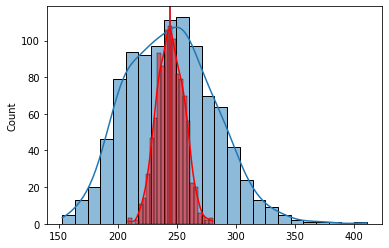

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(sampled50, kde=True)
plt.axvline(np.mean(sampled50))
sns.histplot(sampled500, kde=True, color='r')
plt.axvline(np.mean(sampled50), color = 'r')

## Q7. (통계적 가설 검정) 사회과학에 관심이 많은 재민이는 율도국의 성별에 따라 월 평균 소득에 차이가 있을 것이라고 생각하고 있다. 아래 코드에 재민이가 이 연구를 수행하기 위해 세운 귀무가설과 대립가설을 입력하세요.

In [5]:
print("귀무가설(H0): 율도국은 성별에 따라 월 평균 소득에 차이가 없다.")
print("대립가설(Ha): 율도국은 성별에 따라 월 평균 소득에 차이가 있다.")

귀무가설(H0): 율도국은 성별에 따라 월 평균 소득에 차이가 없다.
대립가설(Ha): 율도국은 성별에 따라 월 평균 소득에 차이가 있다.


## Q8. 재민이는 율도국의 평균 나이가 35세 라는 귀무가설이 맞다는 전제 하에 크기가 100인 표본을 추출하였는데, 이 때 표본평균이 50세로 나타났다. 이러한 통계치가 관측될 확률(p-value)를 구하는 코드를 작성하세요.

In [17]:
import scipy
z_score = (50 - 35) / (df['age'].std()/100**0.5)
p_value =  scipy.stats.norm.sf(z_score)
p_value

1.446877134503575e-51

## Q9. 재민이는 Q8에서 수행한 결과를 학회에서 발표하였다. 그러나 율도국 정부에서 인구주택총조사를 진행하여 율도국 국민들의 나이를 조사한 결과 재민이가 추출한 표본은 극단적인 값임이 확인되었다. 이 때, 재민이가 범한 오류는 "1종 오류"와 "2종 오류" 중 무엇인지 출력하세요.

In [18]:
print("1종 오류")

1종 오류


## Q10. 재민이는 율도국 국민들이 나이가 들수록 더 많은 소득을 얻을 것이라고 생각하고 있다. 재민이의 주장이 맞으려면 age와 salary를 단순 선형 회귀 분석하였을 때, slope가 양수여야 하며, p-value는 0.05보다 작아야 한다. 이러한 가설을 확인 할 수 있도록 선형 회귀 분석을 하고 이를 summary하는 테이블을 출력하는 코드를 작성하세요.

In [19]:
import statsmodels.api as sm
model = sm.OLS.from_formula("salary ~ age", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3536
Date:                Thu, 12 May 2022   Prob (F-statistic):              0.552
Time:                        22:45:56   Log-Likelihood:                -69673.
No. Observations:               10000   AIC:                         1.394e+05
Df Residuals:                    9998   BIC:                         1.394e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    249.7240      9.258     26.973      0.000     231.576     267.872
age           -0.1534      0.258     -0.595      0.552      -0.659       0.352
==============================================================================
Omnibus:                     1184.758   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1659.560
Skew:                           0.996   Prob(JB):                         0.00
Kurtosis:                       2.880   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Q11. 재민이는 대전, 서울, 대구, 광주 지역의 Red당의 지지율에 의미 있는 차이가 있다고 생각했다. 이를 확인하기 위해 재민이는 여론조사를 실시하여 크기 1,000개짜리 표본을 추출하였다. 재민이의 가설이 맞는지 ANOVA를 실시하여 확인하는 코드를 작성하세요.

In [28]:
df['party_int'] = df['party'].apply(lambda x: 1 if x == "Blue" else 0)
df1000 = df.sample(1000)
from statsmodels.formula.api import ols
model = ols('party_int ~ location', data=df1000).fit()
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
location,16.0,13.794527,0.862158,3.58812,0.000002
Residual,983.0,236.196473,0.240281,NaN,NaN


In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(df1000['party_int'], df1000['location'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    강원     경기   0.0225    1.0 -0.2488  0.2938  False
    강원     경남  -0.0264    1.0 -0.3615  0.3087  False
    강원     경북   0.0362    1.0 -0.2818  0.3542  False
    강원     광주   0.1117 0.9987 -0.2063  0.4297  False
    강원     대구   0.1331 0.9918 -0.1882  0.4545  False
    강원     대전   0.4719    0.0  0.1555  0.7883   True
    강원     부산  -0.0224    1.0 -0.3532  0.3083  False
    강원     서울   0.0237    1.0 -0.2521  0.2995  False
    강원     세종  -0.0069    1.0  -0.311  0.2972  False
    강원     울산  -0.0641    1.0 -0.4234  0.2953  False
    강원     인천   0.1277 0.9801 -0.1548  0.4102  False
    강원     전남   0.0645    1.0 -0.2705  0.3996  False
    강원     전북   0.0113    1.0 -0.3174  0.3401  False
    강원     제주   0.1756 0.8845 -0.1408   0.492  False
    강원     충남  -0.0718    1.0 -0.3867   0.243  False
    강원     충북   0.0326    1.0 -0.2961  0.3613 